<a href="https://colab.research.google.com/github/mahauni/cognitivecomputing/blob/master/material/aulas/PDI/lab04/Filtros_de_Convolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   Conhecer processo generico de filtro de convolução
*   conhecer os filtros de blurring (suavização)
*   conhecer o filtro de sharpening (realce)
*   conhecer o filtro de limiar e suas variações
*   conhecer o detetor linhas de canny

In [3]:
## Vou fazer o download das imagens do laboratório diretamente do repositório para ficar mais facil....

import requests
import os

# Define o laboratório
laboratorio = 'lab04'  ### altere para o laboratório desejado
diretorio = 'lab_images'  ### altere para o diretório que deseja salvar as imagens

%matplotlib inline
from matplotlib import pyplot as plt

# Download de um arquivo
def download_file(url, destination):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Baixado: {destination}")
    else:
        print(f"Erro ao baixar {url}")

# Monta a URL completa
api_url = "https://api.github.com/repos/arnaldojr/cognitivecomputing/contents/material/aulas/PDI/"
url_completa = api_url + laboratorio
print(f"Fazendo o download de: {url_completa}")

# checa se a URL está acessível
response = requests.get(url_completa)
if response.status_code != 200:
    raise Exception(f"Erro ao acessar o repositório: {response.status_code}")
files = response.json()


# Faz o download de cada arquivo
os.makedirs(diretorio, exist_ok=True) # Cria a pasta downloads
for file in files:
    file_name = file['name']
    if file_name.endswith(('.png', '.jpg', '.jpeg', '.mp4')):  # Adicione mais extensões se necessário
        file_url = file['download_url']
        destination = os.path.join(diretorio, file_name)
        download_file(file_url, destination)

print(f"Download concluído. Arquivos salvos na pasta {diretorio}.")

Fazendo o download de: https://api.github.com/repos/arnaldojr/cognitivecomputing/contents/material/aulas/PDI/lab04
Baixado: lab_images/convolution.png
Baixado: lab_images/lena.png
Baixado: lab_images/people-walking.mp4
Baixado: lab_images/saida.png
Baixado: lab_images/sudoku.png
Baixado: lab_images/tux.png
Download concluído. Arquivos salvos na pasta lab_images.


## Introdução aos Filtros de Convolução

O **filtro de convolução** é um nomes dados para **filtragem no domínio espacial**. Esse processo ocorre com a aplicação de **filtros** (pequenas matrizes), posicionados sob cada pixel da imagem. Estes filtros, normalmente, são chamados de **kernels (ou núcleos)**. O resultado final do valor do pixel é calculado através de um **produto de convolução**.

Normalmente os **kernels** são matrizes 3x3, 5x5 ou 7x7.



## Desafio 0

Abra o link [https://setosa.io/ev/image-kernels/](https://setosa.io/ev/image-kernels/) e de forma intuitiva altere o valor do filtro/kernel e descubra efeitos resultantes.

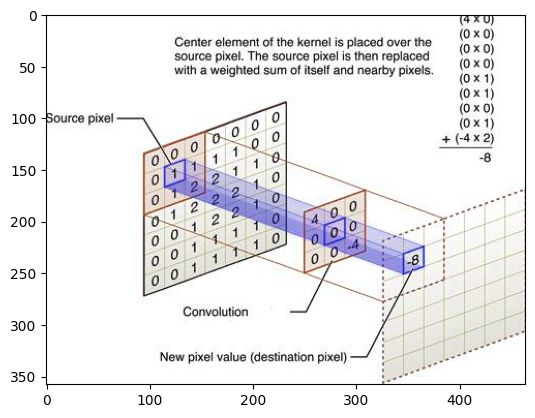

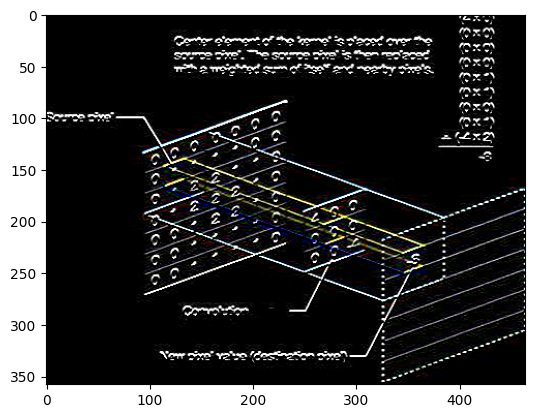

In [9]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/convolution.png')

plt.imshow(img); plt.show()

kernel = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

imgf = cv2.filter2D(img,-1,kernel)

plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255); plt.show()

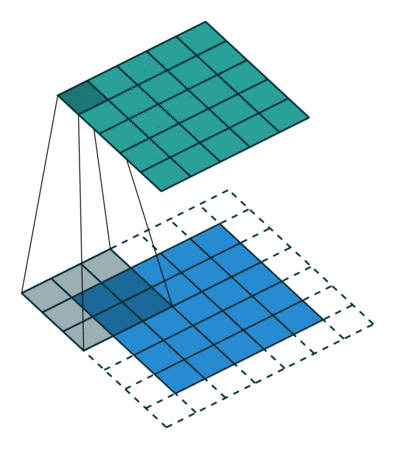

In [ ]:
from IPython.display import Image
Image(open('same_padding_no_strides.gif','rb').read())

**Observação**

Embora o nome convolução seja muito usado, na prática realizamos o processo de **correlação**, para realizar a convolução é necessário realizar a inversão da **mascara (matriz)**, o que não é um problema pois em **processamento de imagem**, tipicamente os **kernels** são simétricos, logo os resultados de convolução e correlação não mudam.


## **Implementação na OpenCV**

Podemos implementar o produto de convolução montando uma estrutura com dois for para varrer a imagem toda, pixel-a-pixel.Não é a forma mais eficiente, pois Na OpenCV tem uma função built-in para implementação de filtro de convolução a **cv2.filter2D()**

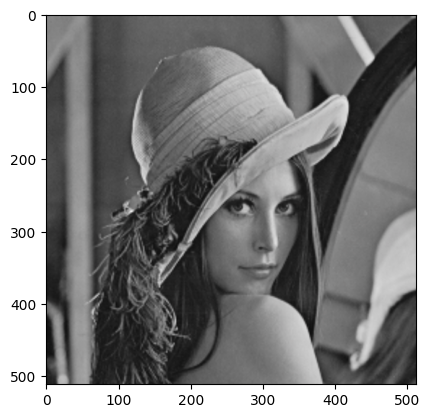

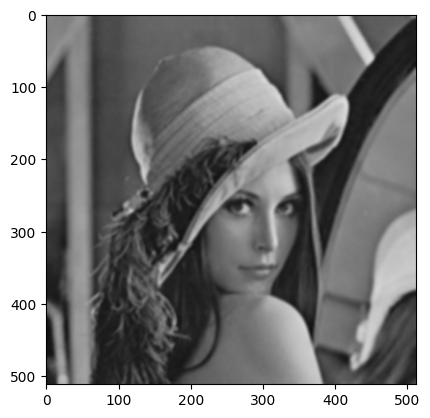

In [7]:
import numpy as np
import cv2


#carrega imagem
img = cv2.imread('lab_images/lena.png')
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()

# Define o kernel
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1 ,1]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

# Realiza o produto de convolução
imgf = cv2.filter2D(img,-1,kernel)

#exibe resultado filtrado
plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255); plt.show()

**FILTROS PARA BLURRING**

O filtro de **blurring (borramento)** consiste na  perda gradual de foco da imagem, produzindo a sensação que ela está borrada. Em outras palavras são filtros passa-baixa.

Existem diversos métodos para construções de kernels para blurring:


*   **filtro da média (box filter)**: blur = cv.blur(img,(5,5))
*   **filtro gaussiano**: blur = cv.GaussianBlur(img,(5,5),0)
*   **filtro da mediana**: blur = cv.medianBlur(img,5)
*   **filtro bilateral**: blur = cv.bilateralFilter(img,9,75,75)

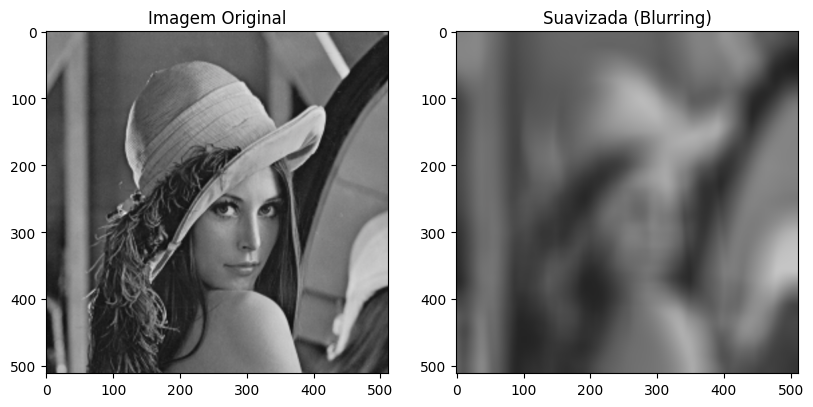

In [ ]:
import numpy as np
import cv2

#carrega imagem
img = cv2.imread('lena.png')

# Realiza o blur
imgf = cv2.blur(img,(51,51),0)

# Exibir as imagens
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Suavizada (Blurring)')
plt.imshow(imgf, cmap='gray')

## Desafio 1

Escolha uma imagem da sua preferência e faça um estudo sobre os diferentes tipos de filtros de borramento, analise também o que acontece quando é alterado o tamanho do kernel.


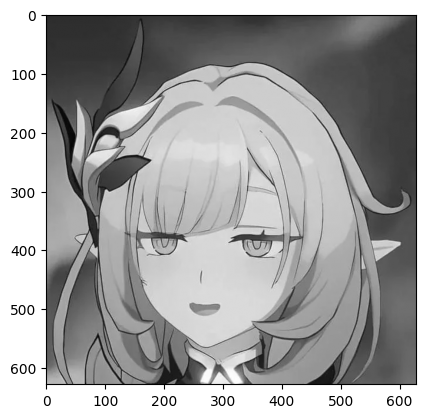

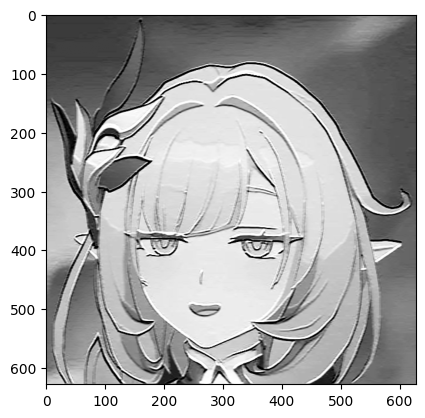

In [25]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('lab_images/ely.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray"); plt.show()

kernel = np.array([[1, 2, 1, 2, 1],
                   [2, 3, 4, 3, 2],
                   [0, 0, 0, 0, 0],
                   [-2, -3, -4, -3, -2],
                   [1, -2, 1, -2 ,1]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

imgf = cv2.filter2D(img,-1,kernel)

plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255); plt.show()

**FILTRO DE SHARPENING**

O filtro de **sharpening** consiste no ganho gradual de foco de uma imagem, produzindo a sensação que ela está cada vez mais bem definida. É uma aproximação da inversa do filtro de blurring.

Existem diversos métodos para construções de kernels para blurring:


*   **filtro Sobel X**: imgf = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
*   **filtro Sobel Y**: imgf = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
*   **filtro Laplaciano**: imgf = cv.Laplacian(img,cv.CV_64F)


Abaixo, temos as formas matriciais do filtro de sharpening.

In [ ]:
#Filtro Laplaciano
kernel = np.array([[0, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 0]])

kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])
#filtro de Sobel X
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
kernel = np.array([[-1, -2, -1],
                   [ 0, 0, 0],
                   [-1, 0, 1]])

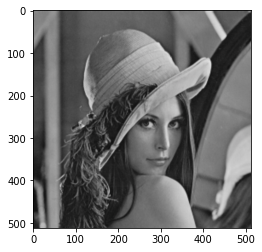

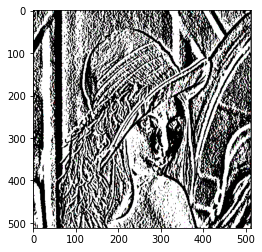

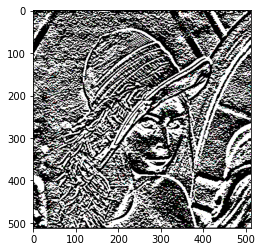

In [ ]:
import numpy as np
import cv2


#carrega imagem
img = cv2.imread('lena.png')
plt.imshow(img, cmap="Greys_r", vmin=0, vmax=255); plt.show()



imgf = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
imgf2 = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

# Monta o kernel filtro
#kernel = np.array([[-1, -1, -1],
#                   [-1, 8, -1],
#                   [-1, -1, -1]])
# Realiza o produto de convolução
#imgf = cv2.filter2D(img,-1,kernel)

#exibe resultado filtrado
plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255);plt.show()
plt.imshow(imgf2, cmap="Greys_r", vmin=0, vmax=255); plt.show()

## Desafio 2

Escolha uma imagem da sua preferência e faça um estudo sobre os diferentes tipos de filtros de contraste, analise também o que acontece quando é alterado o tamanho do kernel.

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread('lab_images/ely.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray"); plt.show()

kernel = np.array([[1, 2, 1, 2, 1],
                   [2, 3, 4, 3, 2],
                   [0, 0, 0, 0, 0],
                   [-2, -3, -4, -3, -2],
                   [1, -2, 1, -2 ,1]])
kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

imgf = cv2.filter2D(img,-1,kernel)

plt.imshow(imgf, cmap="Greys_r", vmin=0, vmax=255); plt.show()

**FILTRO DE BORDAS DE CANNY**

O filtro de **canny** é um detector de linhas e bordas que combina de forma mais sofisticada operações lineares.

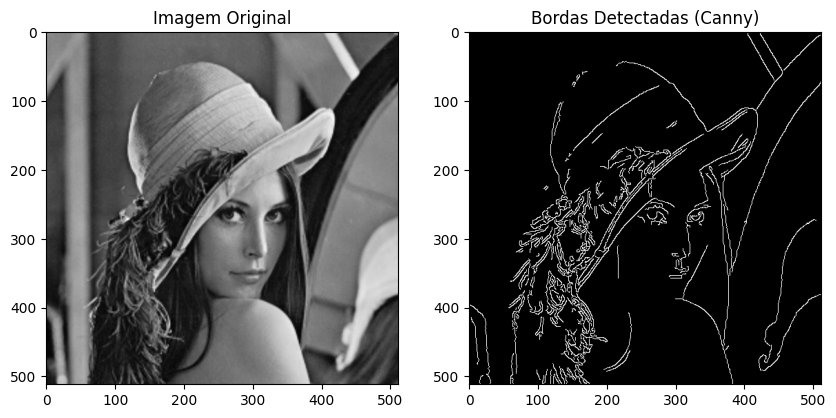

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('lab_images/lena.png', cv2.IMREAD_GRAYSCALE)


threshold_min = 100
threshold_max = 200
# Aplicar o detector de bordas de Canny
edges = cv2.Canny(image, threshold1=threshold_min, threshold2=threshold_max)

# Exibir a imagem original e a imagem com bordas detectadas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Bordas Detectadas (Canny)')
plt.imshow(edges, cmap='gray')
plt.show()

## Desafio 3

O Filtro de Canny é um dos mais utilizados até hoje, por ser robusto e apresentar bons resultados.

Ajuste os valores de threshold1 e threshold2 no detector de Canny e observe como os limiares afetam a detecção de bordas. Tente encontrar os valores ideais para diferentes imagens.

In [ ]:
#Seu código

## FILTRO DE LIMIARIZAÇÃO

O filtro de limiarização é uma técnica que converte uma imagem em tons de cinza em uma imagem binária, onde os pixels são classificados como preto ou branco com base em um valor de limiar.
Essa técnica é utilizada em tarefas como segmentação de objetos, detecção de bordas e pré-processamento de imagens.

O OpenCV oferece várias técnicas de limiarização, cada uma com suas particularidades. Abaixo estão as principais:

- **cv2.THRESH_BINARY**: Pixels acima do limiar são definidos como branco (255), e os abaixo, como preto (0).
- **cv2.THRESH_BINARY_INV**: Inverso do THRESH_BINARY. Pixels acima do limiar são definidos como preto, e os abaixo, como branco.
- **cv2.THRESH_TRUNC**: Pixels acima do limiar são truncados ao valor do limiar, enquanto os abaixo permanecem inalterados.
- **cv2.THRESH_TOZERO**: Pixels abaixo do limiar são definidos como preto, e os acima permanecem inalterados.
- **cv2.THRESH_TOZERO_INV**: Inverso do THRESH_TOZERO. Pixels acima do limiar são definidos como preto, e os abaixo permanecem inalterados.
- **cv2.THRESH_OTSU**: Método automático para determinar o limiar ideal, especialmente útil para imagens com histogramas bimodais

**DICA**

- cv2.threshold(): Função usada para aplicar a limiarização. Recebe a imagem, o valor do limiar, o valor máximo (geralmente 255) e o tipo de limiarização.
- cv2.THRESH_OTSU: Método automático que calcula o limiar ideal com base no histograma da imagem. Não é necessário fornecer um valor de limiar manualmente.

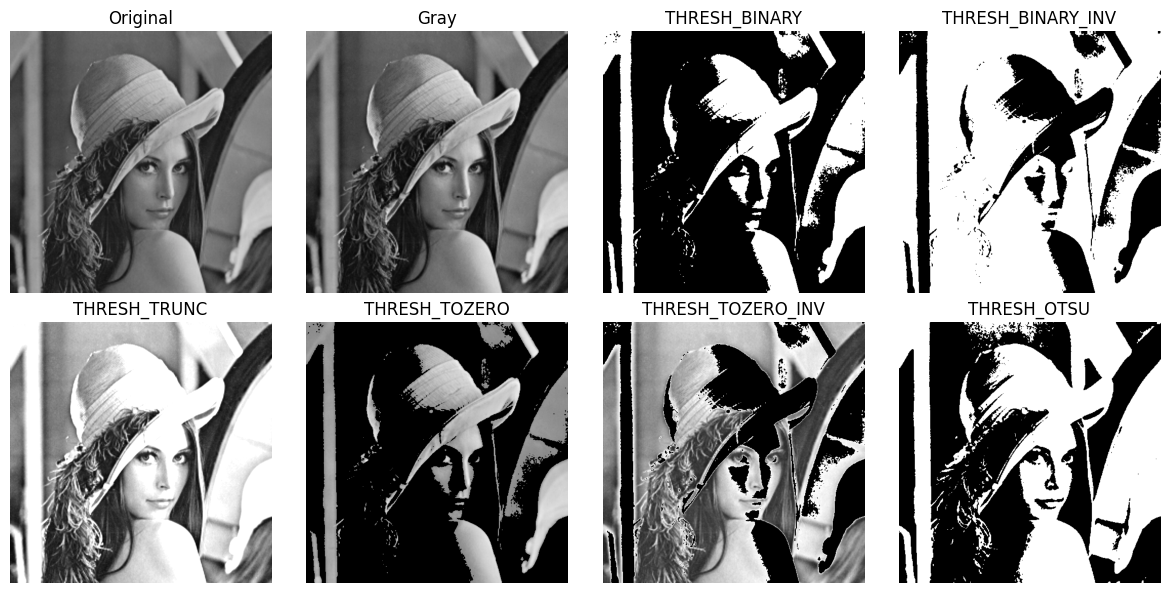

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar imagem em escala de cinza
img_original = cv2.imread('lena.png')
img = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)


# Definir um valor de limiar
threshold_value = 127

# Aplicando Filtro de Limiarização
_, thresh_binary = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
_, thresh_binary_inv = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)
_, thresh_trunc = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TRUNC)
_, thresh_tozero = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO)
_, thresh_tozero_inv = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO_INV)
_, thresh_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

titles = ['Original','Gray', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_OTSU']
images = [img_original, img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv, thresh_otsu]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for ax, title, image in zip(axes.flat, titles, images):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

## FILTRO DE SOBREPOSIÇÃO DE IMAGENS

O filtro de sobreposição (ou blending) mescla duas imagens, gerando um efeito de transparência ou combinação. A operação matemática para a imagem de saída é dada por:

A operação da imagem de saida é a seguinte: g(x)=(1−α)∗f0(x)+α∗f1(x)


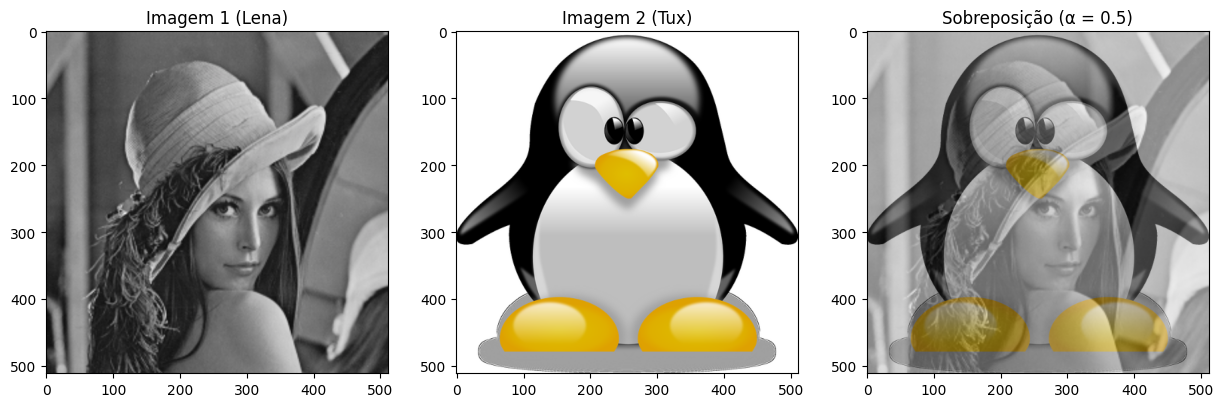

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Carregar duas imagens
image1 = cv2.imread('lab_images/lena.png')
image2 = cv2.imread('lab_images/tux.png')

# Redimensionar as imagens para o mesmo tamanho (se necessário)
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Definir o valor de alpha (transparência)
alpha = 0.5  # 50% de cada imagem

# Aplicar a sobreposição
blended_image = cv2.addWeighted(image1, 1 - alpha, image2, alpha, 0)

# Exibir as imagens
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Imagem 1 (Lena)')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('Imagem 2 (Tux)')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title(f'Sobreposição (α = {alpha})')
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.show()

## Desafio 4

Combine a sobreposição com outros filtros, como suavização ou realce, e observe os efeitos.

In [ ]:
#Seu código aqui.





## Desafio 5

Faça um script python (.py) que processa um video (webcam ou .mp4) e processe cada frame aplicando uma operação de convolução (por exemplo, para detecção de bordas ou desfoque) e exiba o resultado em tempo real.


**Definição da Máscara de Convolução:**

- Escolha e implemente pelo menos uma máscara de convolução.
- Exemplos:
    - Detecção de Bordas: Máscara de Sobel ou Laplaciano.
    - Desfoque: Máscara média ou gaussiana.
- Explique brevemente no código o efeito de cada máscara.

**Organização de código**

- Código bem comentado, com funções (separando as responsabilidades) e estrutura clara.